In [1]:
library(MASS)
library(tree)

In [2]:
data(iris)

In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


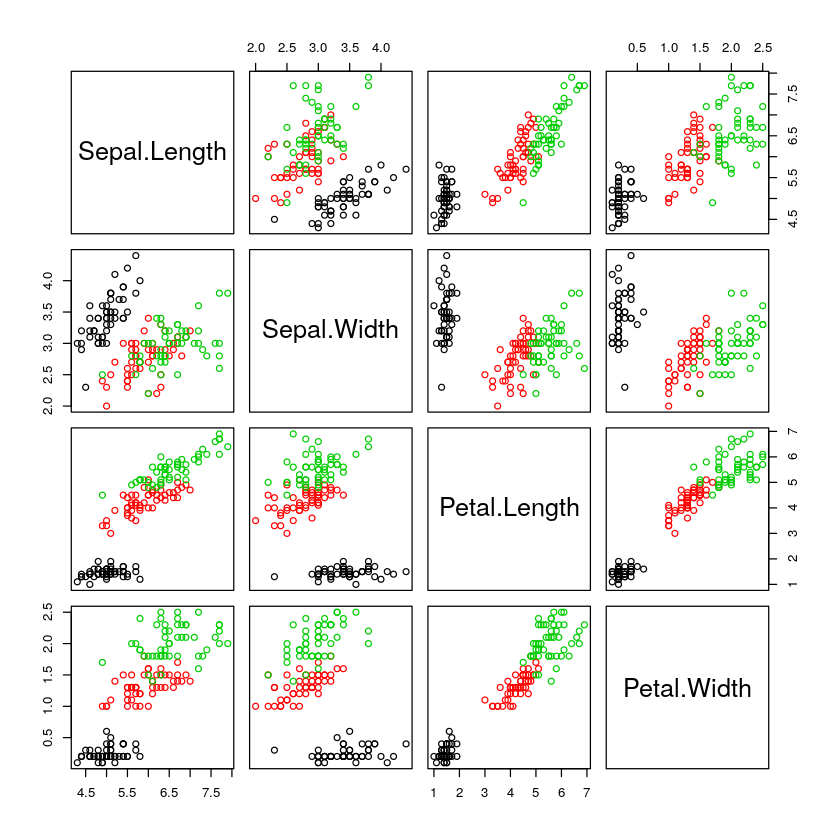

In [4]:
plot(iris[, 1:4], col = iris$Species)

종 species에 따라서 색을 입힌 그래프

# 의사결정나무 모델 생성

In [5]:
ir.tr <- tree(Species~., data = iris)

In [6]:
summary(ir.tr)


Classification tree:
tree(formula = Species ~ ., data = iris)
Variables actually used in tree construction:
[1] "Petal.Length" "Petal.Width"  "Sepal.Length"
Number of terminal nodes:  6 
Residual mean deviance:  0.1253 = 18.05 / 144 
Misclassification error rate: 0.02667 = 4 / 150 

Classification tree 분류 모형 <br>
terminal nodes(최종 이파리)는 6개 <br>
Misclassification error rate 오분류율은 150개 중 4개를 오분류하여 0.02667

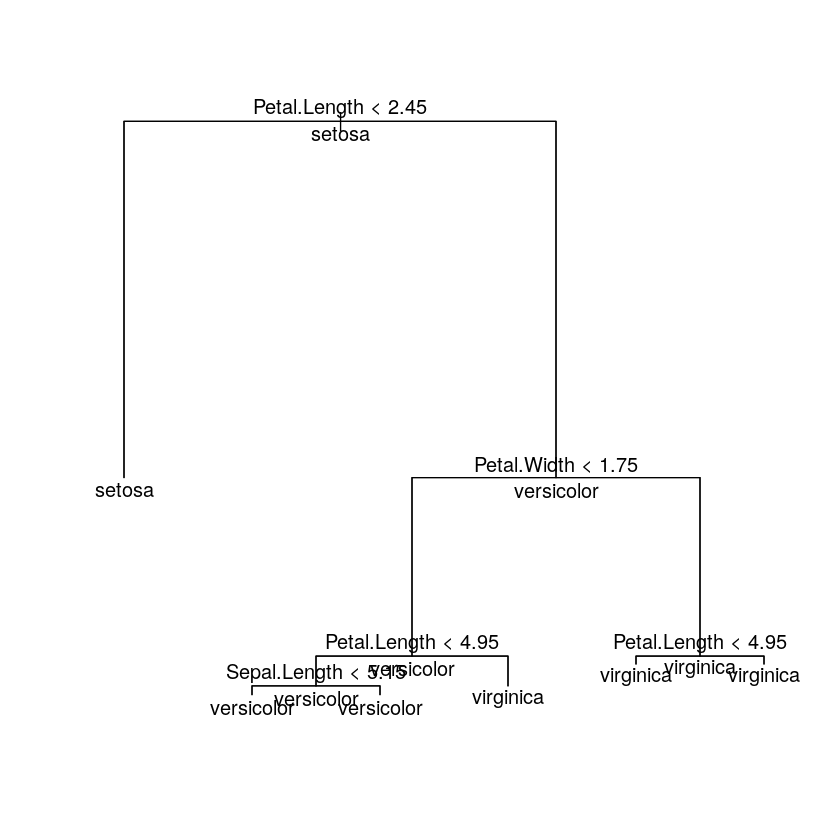

In [7]:
plot(ir.tr)
text(ir.tr, all = T)

plot으로 그리고 text로 글 써줌 <br>
text로 분류 기준 나옴, all 옵션으로 전부 표시

In [8]:
ir.tr

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 )  
        24) Sepal.Length < 5.15 5   5.004 versicolor ( 0.00000 0.80000 0.20000 ) *
        25) Sepal.Length > 5.15 43   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 )  
      14) Petal.Length < 4.95 6   5.407 virginica ( 0.00000 0.16667 0.83333 ) *
      15) Petal.Length > 4.95 40   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

각 노드에 대한 설명, 루트 노드에는 150개 데이터가 있고 각각의 species에 0.3333(=1/3)씩 나눠짐 <br>
2번째 노드에서 Petal.Length를 기준으로 2.45보다 작은 데이터가 50개 존재하며 모두 setosa였다. 순수하기 때문에 더 분류될 것이 없어 터미널 노드이므로 \*이 붙는다. <br>
3번째 노드에서는 PetalLength가 2.45보다 큰 것이 100개 데이터가 남는다. 여기서 다시 노드가 분기 되어 Petal.width가 1.75보다 작은 것이 54개 데이터가 분류되며 이 중 versicolor가 90.741%이다. 

# 모델로 예측

In [9]:
tail(predict(ir.tr), 30)

,setosa,versicolor,virginica
121,0,0.0000000,1.0000000
122,0,0.1666667,0.8333333
123,0,0.0000000,1.0000000
124,0,0.1666667,0.8333333
125,0,0.0000000,1.0000000
126,0,0.0000000,1.0000000
127,0,0.1666667,0.8333333
128,0,0.1666667,0.8333333
129,0,0.0000000,1.0000000
130,0,0.3333333,0.6666667


predict(model)은 학습 데이터에 대해 어떤 레이블로 분류될지 확률을 리턴함

In [10]:
pred <- predict(ir.tr, iris, type = "class")

In [11]:
table(pred, iris$Species)

            
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         1
  virginica       0          3        49

예측과 실제의 교차표

In [12]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [13]:
confusionMatrix(pred, iris$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         1
  virginica       0          3        49

Overall Statistics
                                          
               Accuracy : 0.9733          
                 95% CI : (0.9331, 0.9927)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.96            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9400           0.9800
Specificity                 1.0000            0.9900           0.9700
Pos Pred Value              1.0000            0.9792           0.9423
Neg Pred Value              1.0000            0.9706           0.9898
P

Prevalance: 실제 데이터의 라벨의 비율 <br>
Balanced Accuracy: 각 레이블의 예측 정확도를 나타냄. setosa는 100% 정확하게 분류되었고 나머지는 오류가 있음

# 가지치기 

In [14]:
ir.tr

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 )  
        24) Sepal.Length < 5.15 5   5.004 versicolor ( 0.00000 0.80000 0.20000 ) *
        25) Sepal.Length > 5.15 43   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 )  
      14) Petal.Length < 4.95 6   5.407 virginica ( 0.00000 0.16667 0.83333 ) *
      15) Petal.Length > 4.95 40   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

**불순도에 따라 가지치기** <br>
24번은 12번과 비교했을 때 자식 노드임에도 오히려 불순도가 높음 <br>
14번도 마찬가지로 7번과 비교했을 때 오히려 순수도가 떨어짐

**데이터 수에 따라 가지치기 정지 규칙** <br>
24번이나 13번, 14번은 데이터 수가 너무 작아 일반화 힘드므로 더 이상 가지치기 진행 X

In [15]:
ir.tr1 <- snip.tree(ir.tr, nodes = c(12, 7))

snip.tree를 통해 12번 노드와 7번 노드 가지 치기

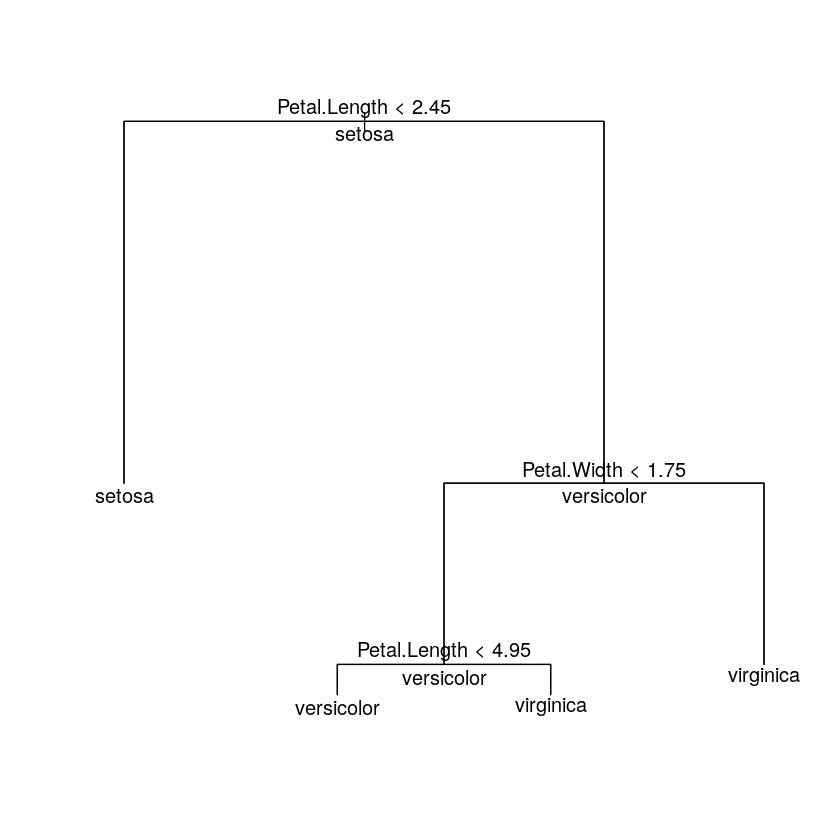

In [16]:
plot(ir.tr1)
text(ir.tr1, all = T)

In [17]:
ir.tr1

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 ) *

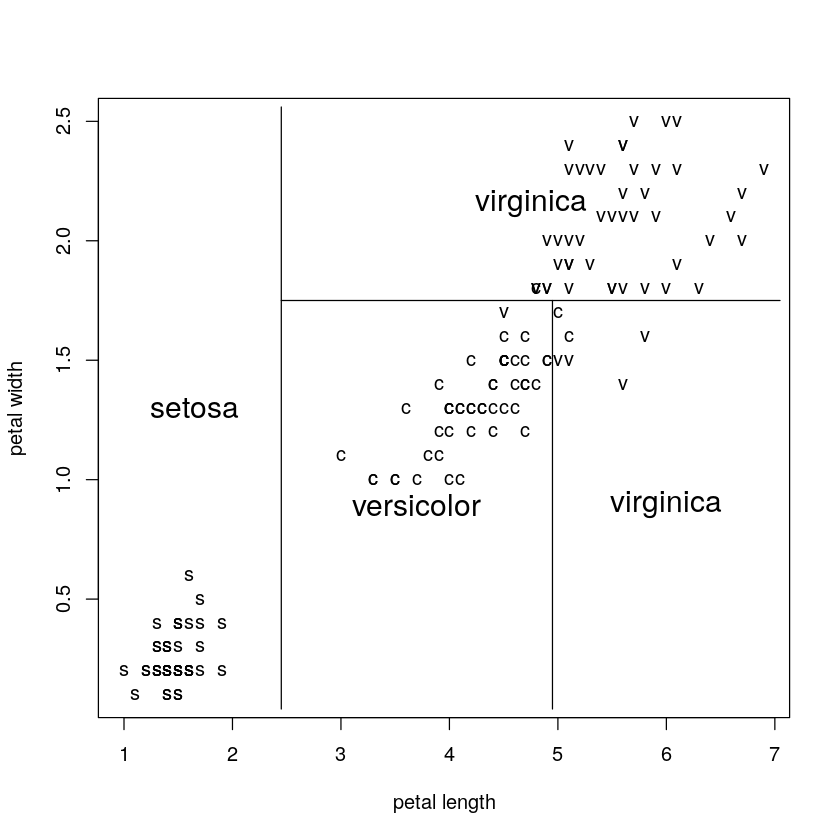

In [18]:
plot(iris[,3],iris[,4], type="n", xlab = "petal length", ylab = "petal width")
text(iris[,3], iris[,4], c("s", "c", "v")[iris[,5]])
partition.tree(ir.tr1, add=T, cex=1.5)

트리의 가지를 나눌 때 중요한 역할을 했던 두 변 수 iris의 3, 4번째 변수 petal.width, petal.length를 x, y축으로 그래프를 그려줌 <br>
s,c, v로 레이블을 주어 시각화함

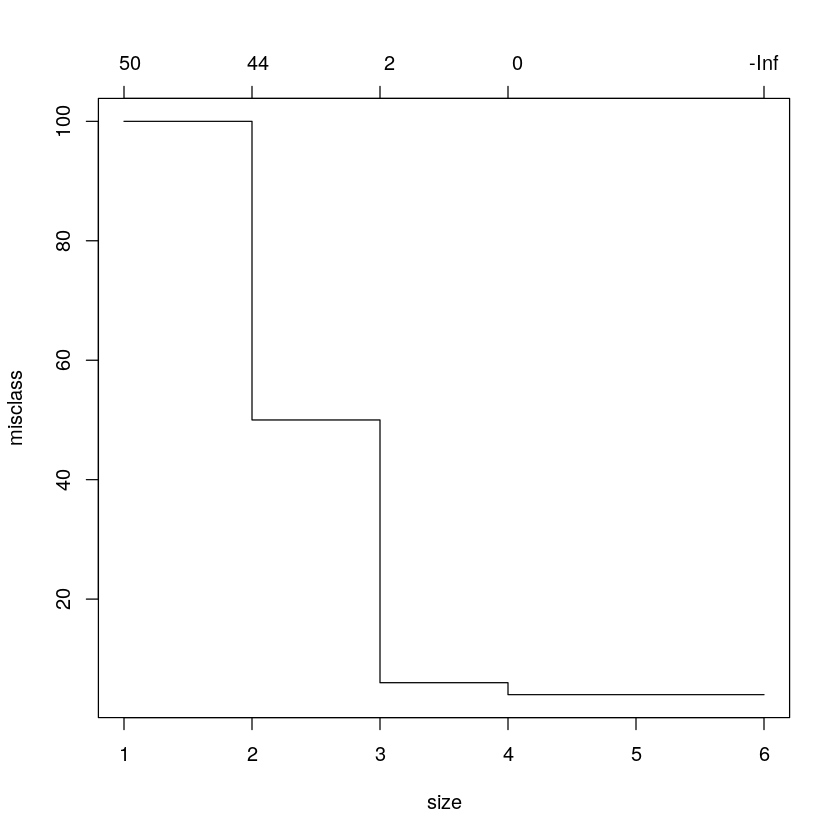

In [50]:
ir.tr2=prune.misclass(ir.tr)
plot(ir.tr2) #적정노드 수의 산정
fin.tr=prune.misclass(ir.tr, best=4)#끝마디의 수는 4

잘못 분류된 misclass의 변화 수가 적은 depth 4지점 정도면 가지치기가 충분함 <br>
그러므로 best = 4로 가지치기를 하여 fin.tr 모델을 생성

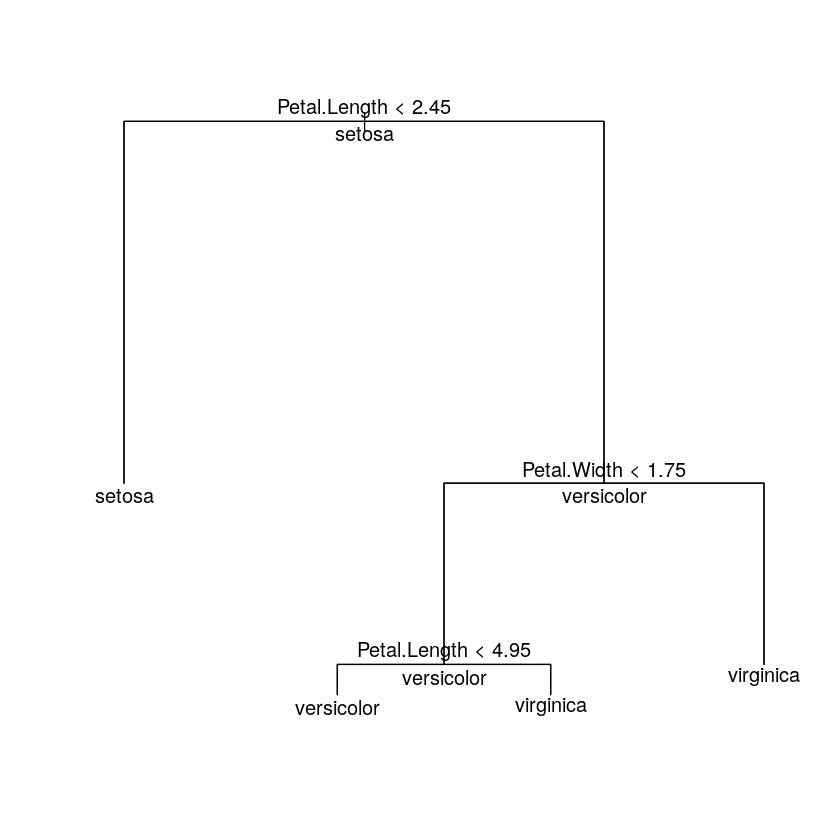

In [52]:
plot(fin.tr)
text(fin.tr, all=T)

# party 라이브러리를 사용한 Decision Tree

In [19]:
library(party)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [20]:
iris.ctree <- ctree(Species~., data = iris)

In [21]:
print(iris.ctree)


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  150 

1) Petal.Length <= 1.9; criterion = 1, statistic = 140.264
  2)*  weights = 50 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 67.894
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 13.865
      5)*  weights = 46 
    4) Petal.Length > 4.8
      6)*  weights = 8 
  3) Petal.Width > 1.7
    7)*  weights = 46 


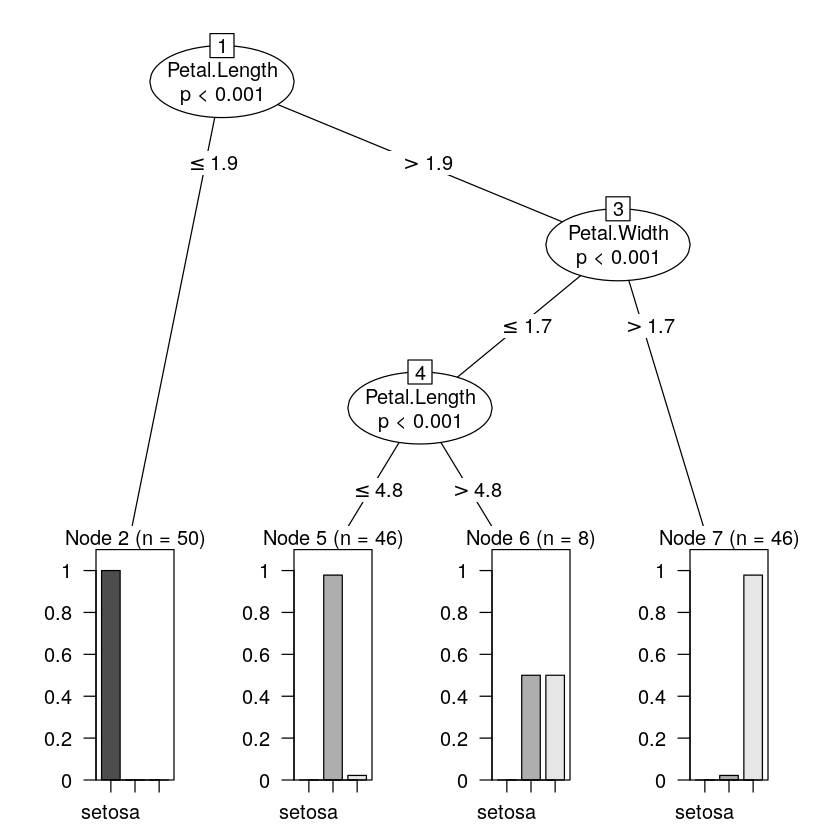

In [22]:
plot(iris.ctree)

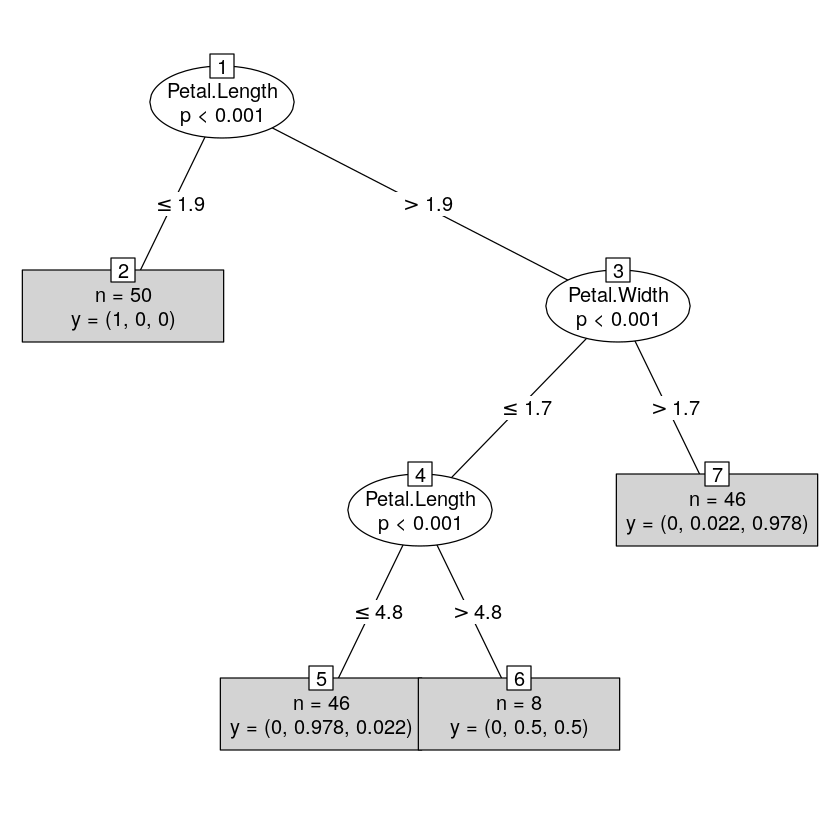

In [23]:
plot(iris.ctree, type = "simple")

# 데이터 분리 split data

In [24]:
set.seed(1234)

In [25]:
ind <- sample(2, nrow(iris), replace = T, prob = c(0.7, 0.3))

난수를 생성하여 iris의 행번호에서 7:3 비율로 나눔

In [26]:
trainData <- iris[ind == 1,]
testData <- iris[ind == 2,]

훈련 7: 테스트 3

In [27]:
myFormula <- Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

같은 식을 다른 데이터에 적용할 경우 이런 식으로 식을 변수에 저장해둘 수 있다.

## train data 학습 

In [28]:
iris.train <- tree(myFormula, data = trainData)

In [29]:
train.pred <- predict(iris.train, type = "class")

In [30]:
table(train.pred, trainData$Species)

            
train.pred   setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         37         3
  virginica       0          1        31

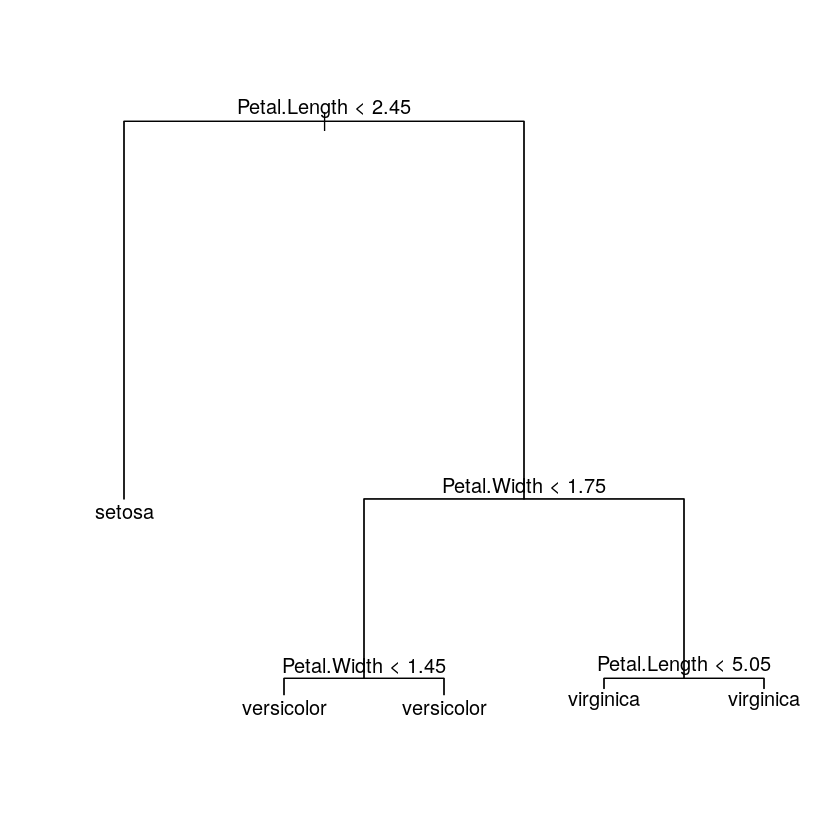

In [31]:
plot(iris.train)
text(iris.train)

## test에 적용

In [32]:
test.pred <- predict(iris.train, newdata = testData, type = "class")

In [33]:
table(test.pred, testData$Species)

            
test.pred    setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         12         2
  virginica       0          0        14

# 의사결정나무 회귀

In [34]:
data("bodyfat", package = "TH.data")

In [35]:
dim(bodyfat)

[1] 71 10

In [36]:
str(bodyfat)

'data.frame':	71 obs. of  10 variables:
 $ age         : num  57 65 59 58 60 61 56 60 58 62 ...
 $ DEXfat      : num  41.7 43.3 35.4 22.8 36.4 ...
 $ waistcirc   : num  100 99.5 96 72 89.5 83.5 81 89 80 79 ...
 $ hipcirc     : num  112 116.5 108.5 96.5 100.5 ...
 $ elbowbreadth: num  7.1 6.5 6.2 6.1 7.1 6.5 6.9 6.2 6.4 7 ...
 $ kneebreadth : num  9.4 8.9 8.9 9.2 10 8.8 8.9 8.5 8.8 8.8 ...
 $ anthro3a    : num  4.42 4.63 4.12 4.03 4.24 3.55 4.14 4.04 3.91 3.66 ...
 $ anthro3b    : num  4.95 5.01 4.74 4.48 4.68 4.06 4.52 4.7 4.32 4.21 ...
 $ anthro3c    : num  4.5 4.48 4.6 3.91 4.15 3.64 4.31 4.47 3.47 3.6 ...
 $ anthro4     : num  6.13 6.37 5.82 5.66 5.91 5.14 5.69 5.7 5.49 5.25 ...


## split data

In [37]:
set.seed(1234)

In [38]:
ind <- sample(2, nrow(bodyfat), replace = T, prob = c(0.7, 0.3))

In [39]:
bodyfat.train <- bodyfat[ind == 1,]
bodyfat.test <- bodyfat[ind == 2,]

## train data 학습 

In [40]:
library(rpart)

의사결정나무 회귀에 필요한 라이브러리

In [41]:
myFormula <- DEXfat ~ age + waistcirc + hipcirc + elbowbreadth + kneebreadth

In [42]:
bodyfat.rpart <- rpart(myFormula, data = bodyfat.train, control = rpart.control(minsplit = 10))

최소 노드 수 10으로 회귀 모델 생성

In [43]:
attributes(bodyfat.rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"            

$xlevels
named list()

$class
[1] "rpart"

rpart 객체가 가진 속성들이 나옴

In [44]:
print(bodyfat.rpart$cptable)

          CP nsplit  rel error    xerror       xstd
1 0.67272638      0 1.00000000 1.0427457 0.19016187
2 0.09390665      1 0.32727362 0.5081173 0.11702581
3 0.06037503      2 0.23336696 0.4522296 0.09801847
4 0.03420446      3 0.17299193 0.3967005 0.09676249
5 0.01708278      4 0.13878747 0.3015476 0.07385485
6 0.01695763      5 0.12170469 0.2929969 0.06850104
7 0.01007079      6 0.10474706 0.2713231 0.06690466
8 0.01000000      7 0.09467627 0.2713231 0.06690466


터미널 노드로 가면서 변화하는 CP와 오분류율 따위를 보여줌

In [45]:
print(bodyfat.rpart)

n= 56 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 56 7265.0290000 30.94589  
   2) waistcirc< 88.4 31  960.5381000 22.55645  
     4) hipcirc< 96.25 14  222.2648000 18.41143  
       8) age< 60.5 9   66.8809600 16.19222 *
       9) age>=60.5 5   31.2769200 22.40600 *
     5) hipcirc>=96.25 17  299.6470000 25.97000  
      10) waistcirc< 77.75 6   30.7345500 22.32500 *
      11) waistcirc>=77.75 11  145.7148000 27.95818  
        22) hipcirc< 99.5 3    0.2568667 23.74667 *
        23) hipcirc>=99.5 8   72.2933500 29.53750 *
   3) waistcirc>=88.4 25 1417.1140000 41.34880  
     6) waistcirc< 104.75 18  330.5792000 38.09111  
      12) hipcirc< 109.9 9   68.9996200 34.37556 *
      13) hipcirc>=109.9 9   13.0832000 41.80667 *
     7) waistcirc>=104.75 7  404.3004000 49.72571 *


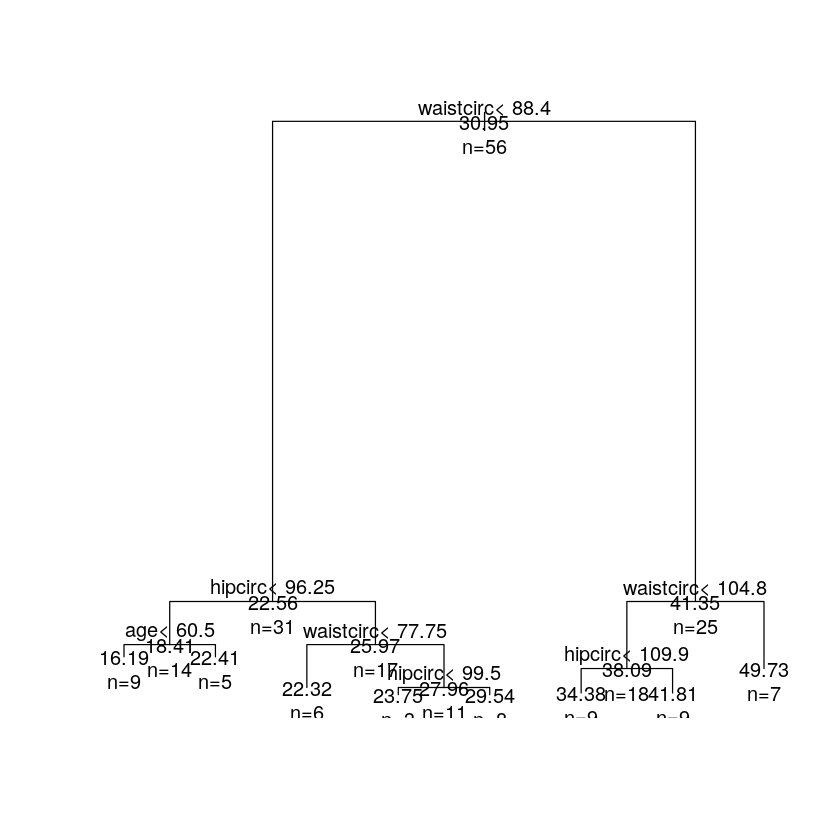

In [46]:
plot(bodyfat.rpart)
text(bodyfat.rpart, all = T, use.n = T)

## test에 적용 

In [47]:
DEXfat_pred <- predict(bodyfat.rpart, newdata = bodyfat.test)

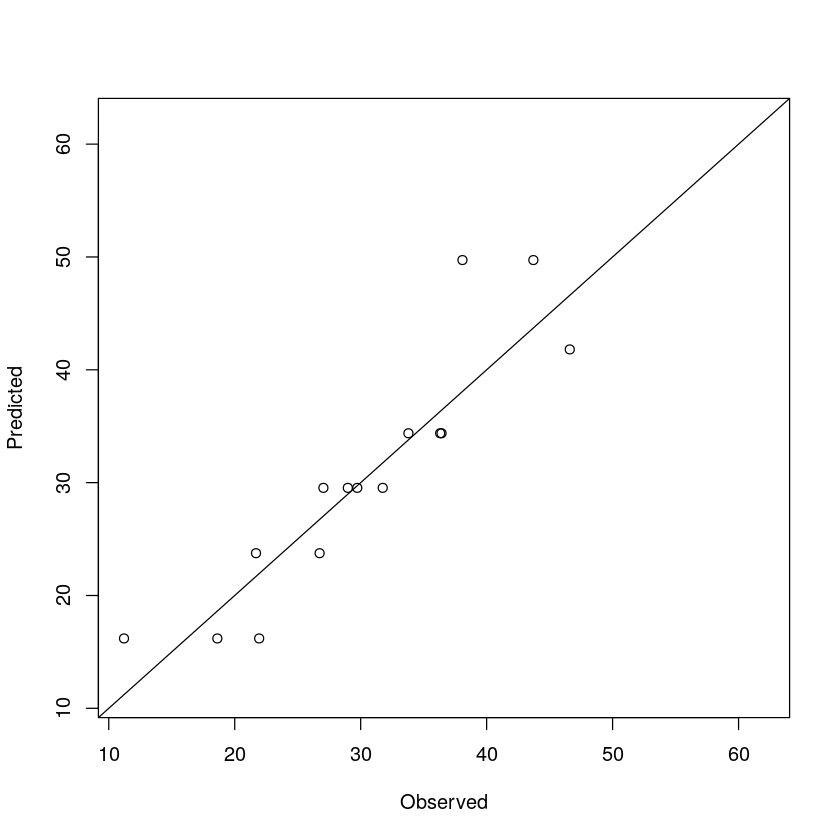

In [48]:
xlim <- range(bodyfat$DEXfat)
plot(DEXfat_pred ~ DEXfat, data=bodyfat.test, xlab="Observed", 
     ylab="Predicted", ylim=xlim, xlim=xlim)
abline(a=0, b=1)

예측이 잘 맞을 수록 선에 점이 모인다.